In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Le dossier noir,1955
1,All Inclusive ili Vsyo vklyucheno!,2011
2,Mediate This,2016
3,Dummy,2002
4,13 Score,2014


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [6]:
t = titles.groupby('year').size()

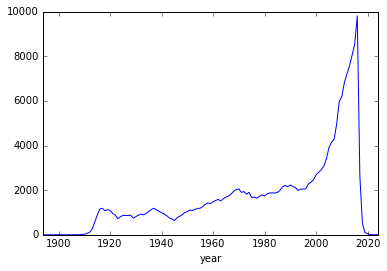

In [8]:
t.plot()

### Use groupby() to plot the number of "Hamlet" films made each decade.

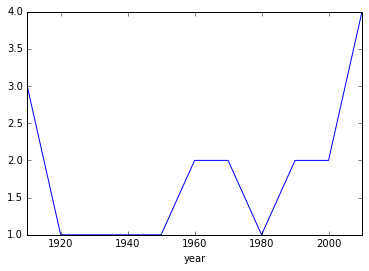

In [11]:
ham = titles[titles.title == 'Hamlet']
ham.groupby(ham.year // 10 * 10).size().plot()

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [15]:
fidy = cast[(cast.year //10 *10 == 1950) & (cast.n == 1)]
fidy.groupby(['year','type']).size()

year  type   
1950  actor      605
      actress    278
1951  actor      636
      actress    273
1952  actor      592
      actress    285
1953  actor      640
      actress    293
1954  actor      629
      actress    298
1955  actor      618
      actress    271
1956  actor      623
      actress    295
1957  actor      710
      actress    291
1958  actor      700
      actress    278
1959  actor      687
      actress    299
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [17]:
fidy = cast[(cast.year //10 * 10 == 1950) & (cast.n < 6)]
fidy.groupby(['type', 'n']).size()

type     n
actor    1    6440
         2    4433
         3    5462
         4    5450
         5    5478
actress  1    2861
         2    4444
         3    3055
         4    2783
         5    2475
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [23]:
p = cast[cast.title == 'The Pink Panther']
p.groupby(['year']).size()
#p

year
1963    19
2006    89
2016     1
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [31]:
frank = cast[cast.name == 'Frank Oz']
f = frank.groupby(['title']).size()
f[f > 1]

title
An American Werewolf in London              2
Muppet Treasure Island                      4
Muppets from Space                          4
Sesame Street Presents: Follow that Bird    3
The Adventures of Elmo in Grouchland        3
The Dark Crystal                            2
The Great Muppet Caper                      6
The Muppet Christmas Carol                  7
The Muppet Movie                            8
The Muppets Take Manhattan                  7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [32]:
frank = cast[cast.name == 'Frank Oz']
f = frank.groupby(['character']).size()
f[f > 1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64